<a href="https://colab.research.google.com/github/Aryy234/study/blob/master/7-semester/ML/wineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from google.colab import drive
# Conectamos con nuestro Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
pip install ucimlrepo


In [2]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

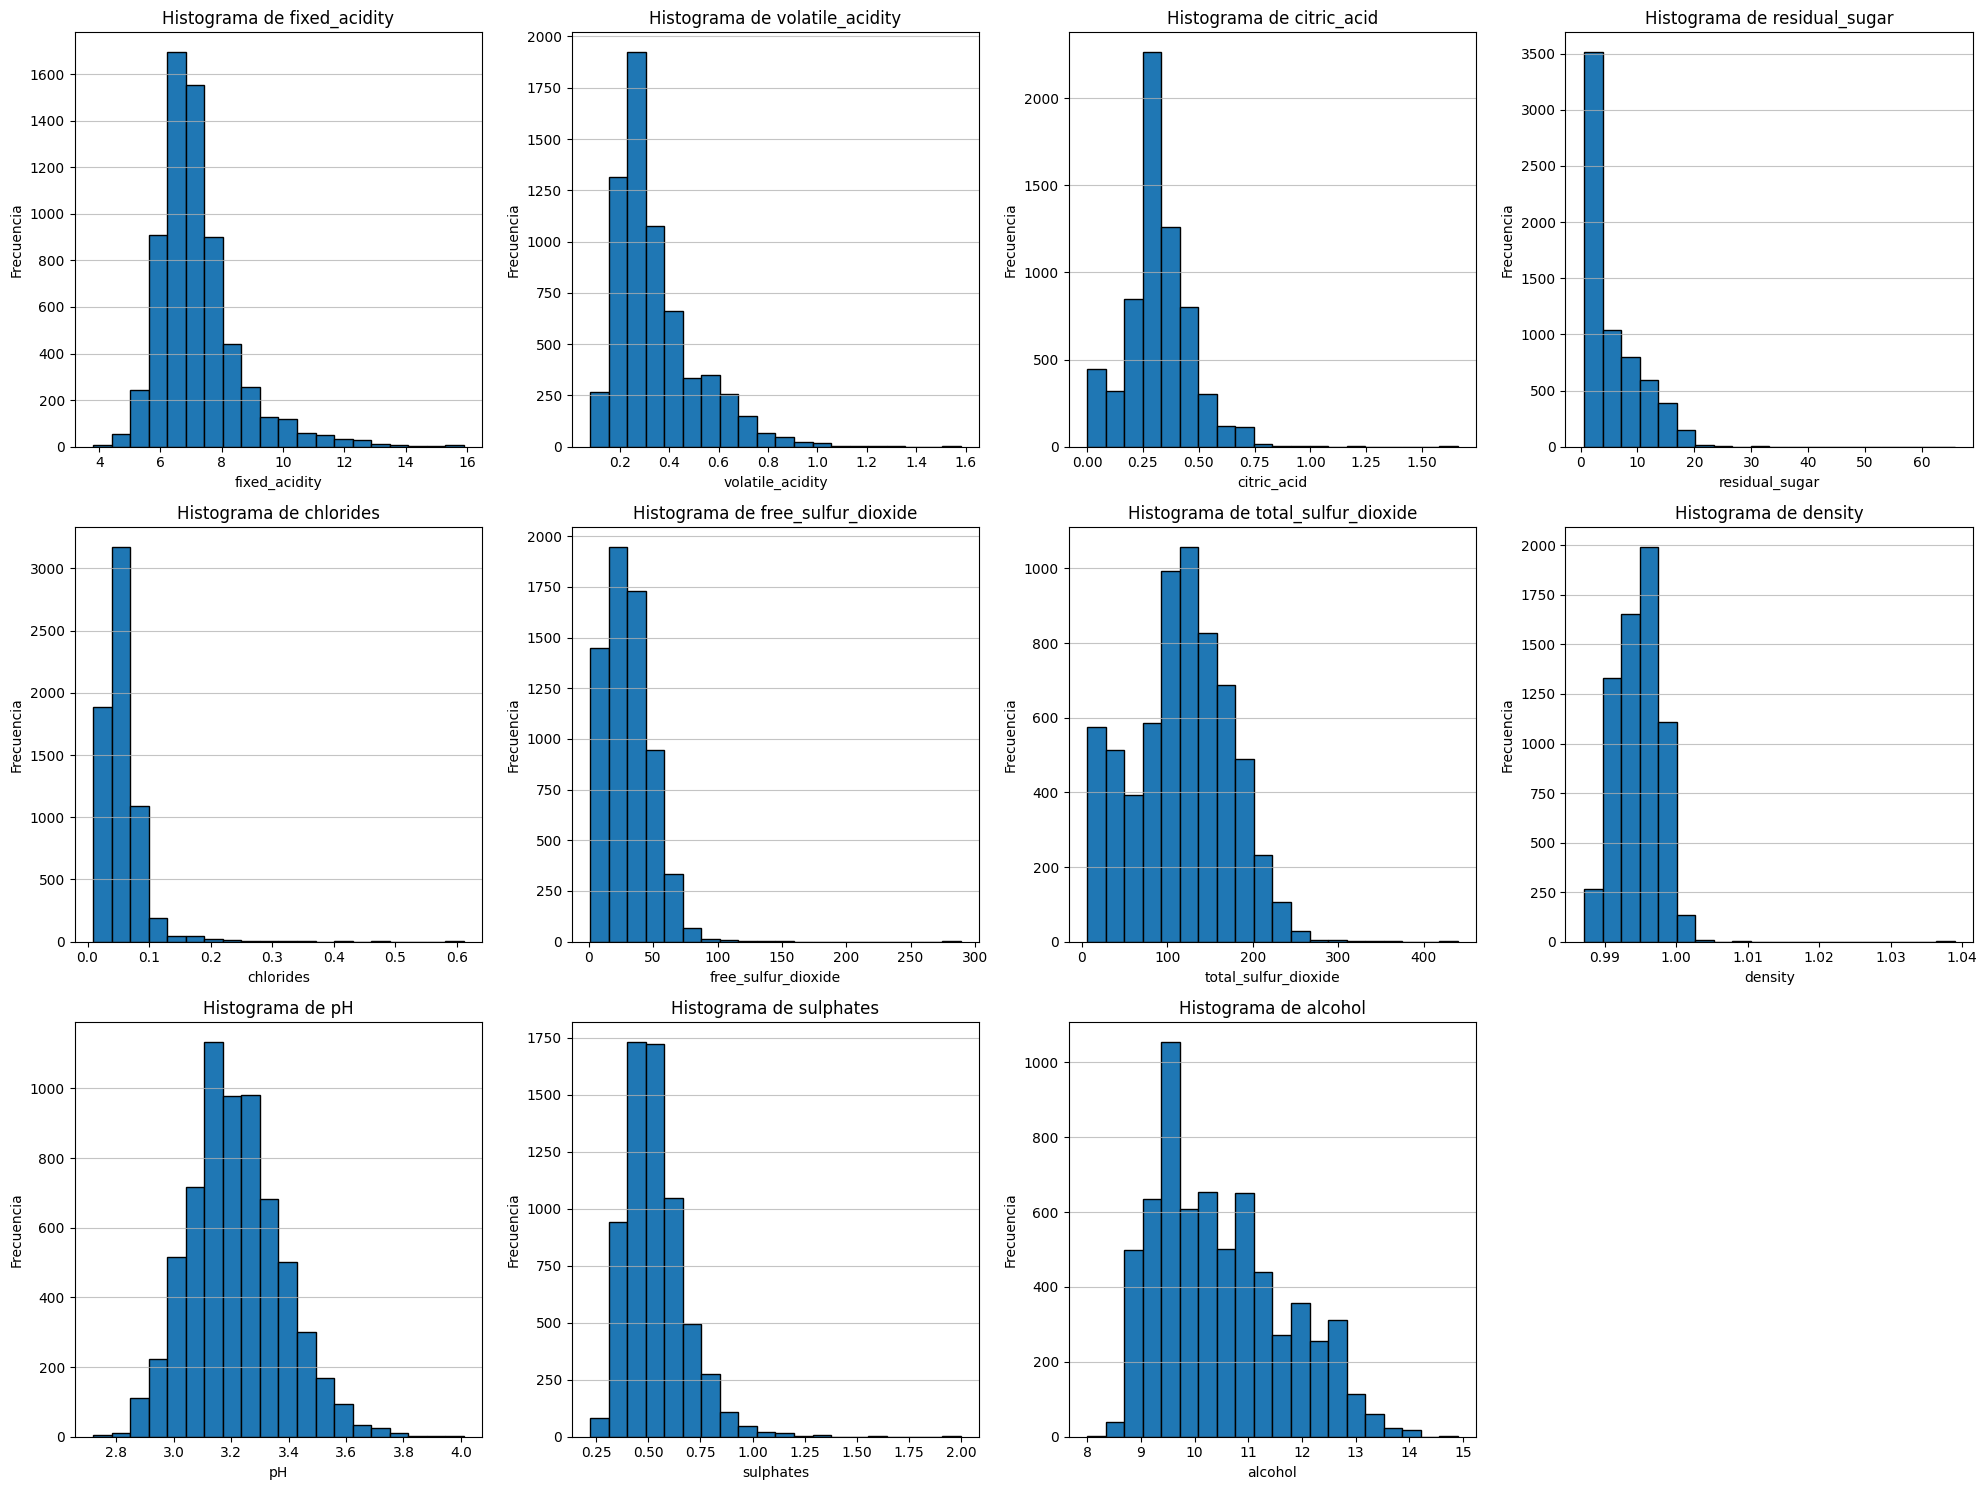

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Instalar ucimlrepo si no está instalado
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    !pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

# Obtener el conjunto de datos
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
variable_info = wine_quality.variables

# Calcular el número de filas y columnas para la figura
num_continuous = variable_info['type'].eq('Continuous').sum()
num_cols = 4  # Número de columnas (histogramas por fila)
num_rows = (num_continuous + num_cols - 1) // num_cols  # Número de filas

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Iterar sobre las variables continuas y crear los histogramas
ax_index = 0
for index, row in variable_info.iterrows():
    if row['type'] == 'Continuous':
        row_index = ax_index // num_cols
        col_index = ax_index % num_cols
        # Handle the case where axes is a 1D array (only one row)
        if num_rows == 1:
            ax = axes[col_index]
        else:
            ax = axes[row_index, col_index]
        ax.hist(X[row['name']], bins=20, edgecolor='black')
        ax.set_title(f'Histograma de {row["name"]}')
        ax.set_xlabel(row['name'])
        ax.set_ylabel('Frecuencia')
        ax.grid(axis='y', alpha=0.75)
        ax_index += 1

# Eliminar los subplots vacíos si los hay
if num_continuous < num_rows * num_cols:
    for i in range(num_continuous, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        # Handle the case where axes is a 1D array
        if num_rows == 1:
            if col_index < num_cols:
                fig.delaxes(axes[col_index])
        else:
            if row_index < num_rows and col_index < num_cols:
                fig.delaxes(axes[row_index, col_index])

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()

## Análisis de los Histogramas de Propiedades Químicas del Vino

### Fila 1:

* **Histograma de fixed\_acidity:**
    * Muestra una distribución **sesgada a la derecha**.
    * La mayoría de los vinos tienen una acidez fija entre **6 y 9**, con un pico alrededor de **7-8**.
    * Hay menos vinos con una acidez fija muy baja o muy alta.

* **Histograma de volatile\_acidity:**
    * Muestra una distribución **sesgada a la derecha**.
    * La mayoría de los vinos tienen una acidez volátil relativamente baja, entre **0.2 y 0.6**, con un pico alrededor de **0.3-0.4**.
    * Hay menos vinos con una acidez volátil alta.

* **Histograma de citric\_acid:**
    * Está fuertemente **sesgado a la derecha**.
    * La mayoría de los vinos tienen una concentración de ácido cítrico muy baja, cercana a **0**.
    * Hay algunos vinos con concentraciones más altas, pero son menos frecuentes.

* **Histograma de residual\_sugar:**
    * Muestra una distribución muy **sesgada a la derecha**.
    * La gran mayoría de los vinos tienen una cantidad muy baja de azúcar residual, por debajo de **5**.
    * Hay algunos vinos con cantidades significativamente mayores de azúcar residual, lo que sugiere que hay algunos vinos dulces en el conjunto de datos.

### Fila 2:

* **Histograma de chlorides:**
    * Muestra una distribución **sesgada a la derecha**.
    * La mayoría de los vinos tienen una concentración de cloruros baja, por debajo de **0.1**.
    * Hay algunos vinos con concentraciones más altas, pero son menos comunes.

* **Histograma de free\_sulfur\_dioxide:**
    * Muestra una distribución **sesgada a la derecha**.
    * La mayoría de los vinos tienen una concentración de dióxido de azufre libre entre **5 y 30**.
    * Hay algunos vinos con concentraciones más altas, que se extienden hasta alrededor de **300**, pero son menos frecuentes.

* **Histograma de total\_sulfur\_dioxide:**
    * Muestra una distribución que parece más cercana a una **distribución normal**, aunque ligeramente **sesgada a la derecha**.
    * La mayoría de los vinos tienen una concentración de dióxido de azufre total entre **100 y 250**, con un pico alrededor de **150-200**.

* **Histograma de density:**
    * Muestra una distribución muy **estrecha** y casi **normal**, centrada alrededor de **0.99**.
    * Esto sugiere que la densidad de los vinos en este conjunto de datos es bastante consistente.

### Fila 3:

* **Histograma de pH:**
    * Muestra una distribución que se asemeja a una **distribución normal**, ligeramente **sesgada a la derecha**.
    * La mayoría de los vinos tienen un pH entre **3.0 y 3.5**, con un pico alrededor de **3.2-3.3**.

* **Histograma de sulphates:**
    * Muestra una distribución **sesgada a la derecha**.
    * La mayoría de los vinos tienen una concentración de sulfatos entre **0.4 y 0.8**, con un pico alrededor de **0.5-0.6**.
    * Hay algunos vinos con concentraciones más altas, pero son menos frecuentes.

* **Histograma de alcohol:**
    * Muestra una distribución que parece ligeramente **bimodal o multimodal**.
    * Hay picos notables alrededor de **9-10%** y **11-12%** de alcohol, lo que sugiere que hay grupos de vinos con diferentes rangos de graduación alcohólica.

* **Histograma sin título:**
    * Este último histograma está **vacío**, lo que sugiere que no hay datos disponibles para esta variable o que hubo un error al generar la imagen.

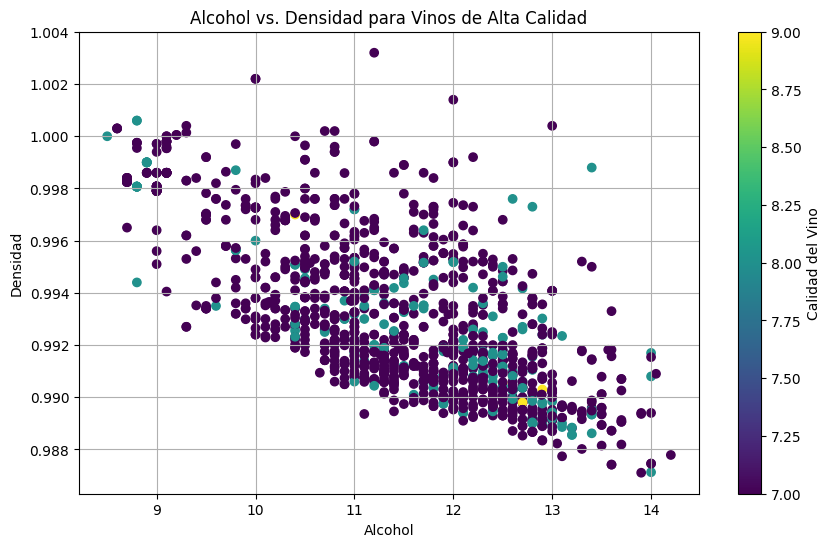

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que 'X' es tu DataFrame con las columnas 'alcohol' y 'densidad'
# y que 'y' es tu variable objetivo (calidad del vino)

# Filtrar para vinos de alta calidad (por ejemplo, calidad 7 u 8)
vinos_alta_calidad = X[y['quality'] >= 7]

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(vinos_alta_calidad['alcohol'], vinos_alta_calidad['density'], c=y.loc[vinos_alta_calidad.index, 'quality'], cmap='viridis')  # Usar la calidad como color
plt.colorbar(label='Calidad del Vino')  # Agregar barra de color para la calidad
plt.title('Alcohol vs. Densidad para Vinos de Alta Calidad')
plt.xlabel('Alcohol')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

## Análisis del Gráfico de Dispersión: Alcohol vs. Densidad en Vinos de Alta Calidad

La imagen muestra un gráfico de dispersión titulado **"Alcohol vs. Densidad para Vinos de Alta Calidad"**.

* **Eje X:** Contenido de alcohol.
* **Eje Y:** Densidad de los vinos.
* **Color de los puntos:** Indica la calidad del vino, según una barra de color a la derecha que va de aproximadamente **7.0 a 9.0**.
    * **Colores cálidos (amarillo):** Mayor calidad.
    * **Colores fríos (morado):** Menor calidad.

### Análisis de la Imagen:

* **Relación entre Alcohol y Densidad:**
    * Se observa una tendencia general a que la **densidad disminuya** a medida que **aumenta** el contenido de alcohol.
    * Esto es esperable ya que el alcohol (etanol) es menos denso que el agua, el componente principal del vino además del alcohol.

* **Calidad del Vino y sus Componentes:**
    * Los vinos de **mayor calidad** (puntos amarillos y verdes) tienden a concentrarse en la región de:
        * Mayor contenido de alcohol (aproximadamente entre **12.5 y 13.5**).
        * Menor densidad (aproximadamente entre **0.989 y 0.991**).
    * Los vinos de **menor calidad** (puntos morados) se encuentran más dispersos, pero hay una concentración notable en la región de:
        * Menor contenido de alcohol (aproximadamente entre **9 y 11**).
        * Mayor densidad (aproximadamente entre **0.994 y 1.000**).

* **Dispersión de los Datos:**
    * Existe una dispersión considerable en los datos, lo que sugiere que la calidad del vino **no está determinada únicamente** por el contenido de alcohol y la densidad.
    * Otros factores, como la acidez, el azúcar residual, los taninos y los compuestos aromáticos, también juegan un papel importante en la calidad del vino.

* **Valores Atípicos:**
    * Se pueden observar algunos puntos que no siguen la tendencia general, lo que podría indicar vinos con características particulares o posibles errores en la medición.

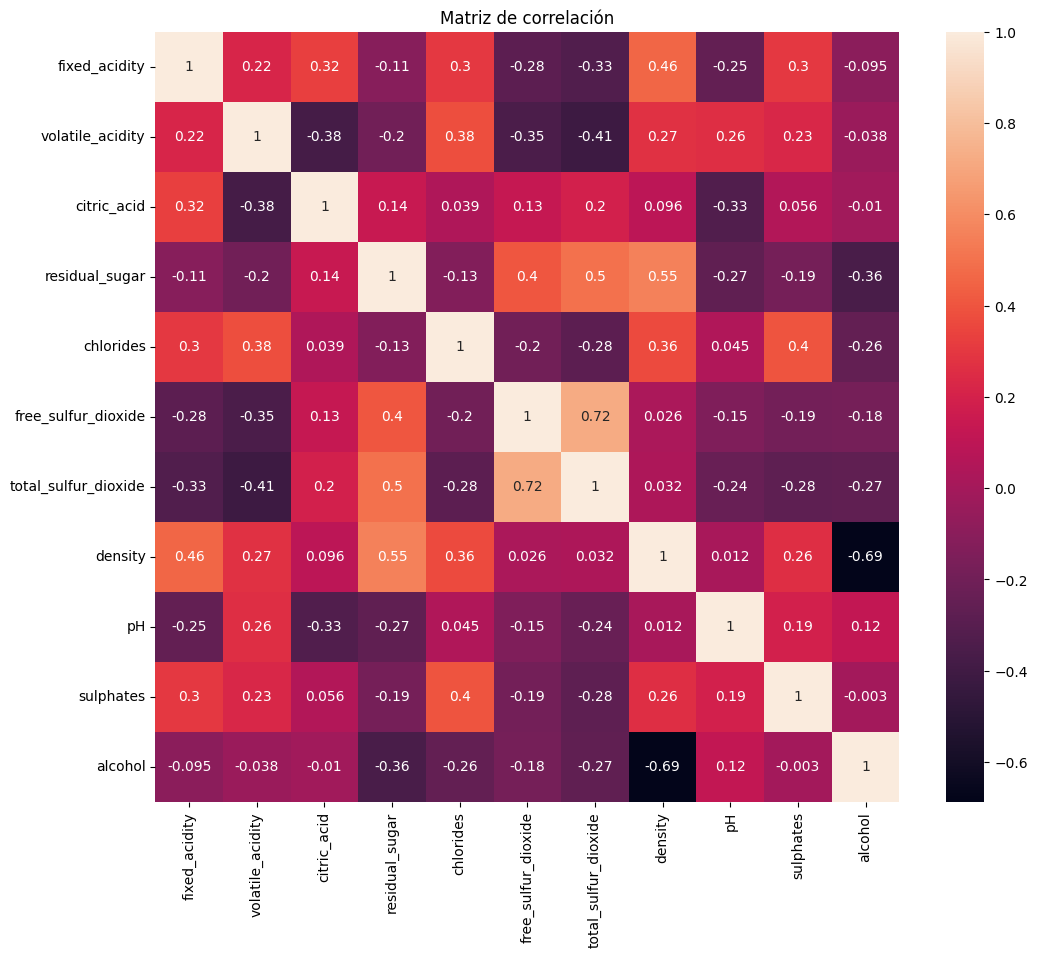

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()

## Análisis de la Matriz de Correlación de Propiedades Químicas del Vino

La imagen muestra una matriz de correlación entre diferentes propiedades químicas del vino. Cada celda del mapa de calor representa el **coeficiente de correlación** entre las dos propiedades correspondientes a su fila y columna. Los valores varían de **-1 a 1**:

* Valores cercanos a **1**: Fuerte correlación positiva.
* Valores cercanos a **-1**: Fuerte correlación negativa.
* Valores cercanos a **0**: Correlación débil o nula.

### Análisis de la Matriz de Correlación:

* **Fuerte Correlación Negativa:**
    * **fixed\_acidity** y **pH**: **-0.69**. Esto es esperado, ya que a mayor acidez fija, el pH tiende a ser más bajo (más ácido).
    * **density** y **alcohol**: **-0.69**. Similar a lo observado en la imagen anterior, una mayor densidad tiende a estar asociada con un menor contenido de alcohol.

* **Fuerte Correlación Positiva:**
    * **free\_sulfur\_dioxide** y **total\_sulfur\_dioxide**: **0.72**. Esto es lógico, ya que el dióxido de azufre libre es un componente del dióxido de azufre total.

* **Correlaciones Positivas Moderadas:**
    * **fixed\_acidity** y **citric\_acid**: **0.32**. Indica que vinos con mayor acidez fija también tienden a tener mayor acidez cítrica.
    * **residual\_sugar** y **density**: **0.55**. El azúcar residual contribuye a la densidad del vino.
    * **chlorides** y **fixed\_acidity**: **0.3**. Puede indicar que la presencia de cloruros está relacionada con la acidez fija.
    * **chlorides** y **sulphates**: **0.4**. Sugiere una posible relación entre la cantidad de cloruros y sulfatos en el vino.
    * **volatile\_acidity** y **fixed\_acidity**: **0.22**. Aunque más débil, sugiere una ligera tendencia a que una mayor acidez volátil se asocie con una mayor acidez fija.
    * **sulphates** y **alcohol**: **0.23**. Una correlación positiva débil, sugiriendo que vinos con mayor contenido de alcohol podrían tener ligeramente más sulfatos.

* **Correlaciones Negativas Moderadas:**
    * **volatile\_acidity** y **citric\_acid**: **-0.38**. Indica que vinos con mayor acidez volátil tienden a tener menor acidez cítrica.

* **Correlaciones Débiles o Nulas (cercanas a 0):**
    * La mayoría de las otras combinaciones de propiedades muestran correlaciones débiles, lo que sugiere que no existe una relación lineal fuerte entre ellas.